## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout, BatchNormalization
from keras.regularizers import l1
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2,l1_ratio=0.001):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
            x = Dropout(drp_ratio)(x)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
            x = Dropout(drp_ratio)(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [128,256]
Dropout_EXP = [0.1,0.25]
l1_exp=[0.0001,1e-8]

In [9]:
results = {}
for batch in BATCH_SIZE:
    for drop in Dropout_EXP:
        for l in l1_exp:
            keras.backend.clear_session()
            print(f"Experiment with L1_ratio {l} drop out ratio {drop} batch size {batch}")
            model=build_mlp(input_shape=x_train.shape[1:], l1_ratio=l, drp_ratio=drop)
            model.summary()
            optimizer = keras.optimizers.SGD(lr=LEARNING_RATE)
            model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
            model.fit(x_train, y_train, epochs=EPOCHS, batch_size=batch, validation_data=(x_test, y_test), shuffle=True)
            
            train_loss = model.history.history["loss"]
            valid_loss = model.history.history["val_loss"]
            train_acc = model.history.history["acc"]
            valid_acc = model.history.history["val_acc"]
            
            exp_name_tag = f"l1-{l}-drop-{drop}-batch-{batch}"
            results[exp_name_tag]={'train_loss':train_loss, "valid_loss":valid_loss, "train_acc":train_acc, "valid_acc":valid_acc}

Experiment with L1_ratio 0.0001 drop out ratio 0.1 batch size 128
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____________________

50000/50000 [==============================] - 22s 433us/step - loss: 5.1748 - acc: 0.4923 - val_loss: 5.1715 - val_acc: 0.4883
Epoch 40/50
50000/50000 [==============================] - 21s 428us/step - loss: 5.1616 - acc: 0.4943 - val_loss: 5.1603 - val_acc: 0.4893
Epoch 41/50
50000/50000 [==============================] - 21s 429us/step - loss: 5.1485 - acc: 0.4959 - val_loss: 5.1483 - val_acc: 0.4938
Epoch 42/50
50000/50000 [==============================] - 21s 425us/step - loss: 5.1380 - acc: 0.4975 - val_loss: 5.1409 - val_acc: 0.4927
Epoch 43/50
50000/50000 [==============================] - 22s 433us/step - loss: 5.1271 - acc: 0.5012 - val_loss: 5.1308 - val_acc: 0.4928
Epoch 44/50
50000/50000 [==============================] - 21s 428us/step - loss: 5.1106 - acc: 0.5040 - val_loss: 5.1232 - val_acc: 0.49260s - loss: 5.1109 - 
Epoch 45/50
50000/50000 [==============================] - 21s 426us/step - loss: 5.1063 - acc: 0.5019 - val_loss: 5.1163 - val_acc: 0.4936
Epoch 46/50


50000/50000 [==============================] - 25s 502us/step - loss: 1.4747 - acc: 0.4762 - val_loss: 1.4446 - val_acc: 0.4863
Epoch 34/50
50000/50000 [==============================] - 24s 476us/step - loss: 1.4660 - acc: 0.4784 - val_loss: 1.4426 - val_acc: 0.4864
Epoch 35/50
50000/50000 [==============================] - 20s 403us/step - loss: 1.4563 - acc: 0.4824 - val_loss: 1.4449 - val_acc: 0.4839
Epoch 36/50
50000/50000 [==============================] - 20s 401us/step - loss: 1.4520 - acc: 0.4829 - val_loss: 1.4361 - val_acc: 0.4902
Epoch 37/50
50000/50000 [==============================] - 20s 400us/step - loss: 1.4461 - acc: 0.4864 - val_loss: 1.4316 - val_acc: 0.4909
Epoch 38/50
50000/50000 [==============================] - 20s 401us/step - loss: 1.4341 - acc: 0.4926 - val_loss: 1.4306 - val_acc: 0.4937TA: 9s  - ETA
Epoch 39/50
50000/50000 [==============================] - 20s 400us/step - loss: 1.4346 - acc: 0.4919 - val_loss: 1.4238 - val_acc: 0.4907
Epoch 40/50
50000/5

Epoch 28/50
50000/50000 [==============================] - 21s 429us/step - loss: 5.5235 - acc: 0.3917 - val_loss: 5.3691 - val_acc: 0.4503
Epoch 29/50
50000/50000 [==============================] - 22s 439us/step - loss: 5.5101 - acc: 0.3925 - val_loss: 5.3529 - val_acc: 0.4534
Epoch 30/50
50000/50000 [==============================] - 22s 435us/step - loss: 5.4973 - acc: 0.3952 - val_loss: 5.3393 - val_acc: 0.4580
Epoch 31/50
50000/50000 [==============================] - 21s 418us/step - loss: 5.4844 - acc: 0.3985 - val_loss: 5.3322 - val_acc: 0.4539
Epoch 32/50
50000/50000 [==============================] - 21s 427us/step - loss: 5.4721 - acc: 0.3984 - val_loss: 5.3207 - val_acc: 0.4581
Epoch 33/50
50000/50000 [==============================] - 21s 424us/step - loss: 5.4577 - acc: 0.4021 - val_loss: 5.3144 - val_acc: 0.4617
Epoch 34/50
50000/50000 [==============================] - 21s 422us/step - loss: 5.4459 - acc: 0.4025 - val_loss: 5.2993 - val_acc: 0.4618
Epoch 35/50
50000/50

Epoch 23/50
50000/50000 [==============================] - 21s 411us/step - loss: 1.7476 - acc: 0.3796 - val_loss: 1.5611 - val_acc: 0.4484
Epoch 24/50
50000/50000 [==============================] - 21s 414us/step - loss: 1.7370 - acc: 0.3810 - val_loss: 1.5519 - val_acc: 0.4534
Epoch 25/50
50000/50000 [==============================] - 20s 409us/step - loss: 1.7236 - acc: 0.3863 - val_loss: 1.5506 - val_acc: 0.4507
Epoch 26/50
50000/50000 [==============================] - 20s 408us/step - loss: 1.7146 - acc: 0.3891 - val_loss: 1.5549 - val_acc: 0.4521
Epoch 27/50
50000/50000 [==============================] - 20s 406us/step - loss: 1.7118 - acc: 0.3885 - val_loss: 1.5421 - val_acc: 0.4561
Epoch 28/50
50000/50000 [==============================] - 20s 405us/step - loss: 1.7025 - acc: 0.3922 - val_loss: 1.5391 - val_acc: 0.4570
Epoch 29/50
50000/50000 [==============================] - 20s 407us/step - loss: 1.6912 - acc: 0.3983 - val_loss: 1.5343 - val_acc: 0.4586
Epoch 30/50
50000/50

50000/50000 [==============================] - 19s 384us/step - loss: 5.6858 - acc: 0.3909 - val_loss: 5.5621 - val_acc: 0.4269
Epoch 18/50
50000/50000 [==============================] - 19s 386us/step - loss: 5.6770 - acc: 0.3924 - val_loss: 5.5480 - val_acc: 0.4276
Epoch 19/50
50000/50000 [==============================] - 19s 383us/step - loss: 5.6625 - acc: 0.3966 - val_loss: 5.5350 - val_acc: 0.4313
Epoch 20/50
50000/50000 [==============================] - 19s 379us/step - loss: 5.6457 - acc: 0.4010 - val_loss: 5.5265 - val_acc: 0.4334
Epoch 21/50
50000/50000 [==============================] - 18s 352us/step - loss: 5.6295 - acc: 0.4062 - val_loss: 5.5145 - val_acc: 0.4368
Epoch 22/50
50000/50000 [==============================] - 17s 338us/step - loss: 5.6185 - acc: 0.4103 - val_loss: 5.5067 - val_acc: 0.4390
Epoch 23/50
50000/50000 [==============================] - 16s 318us/step - loss: 5.6030 - acc: 0.4097 - val_loss: 5.5001 - val_acc: 0.4403
Epoch 24/50
50000/50000 [=======

50000/50000 [==============================] - 16s 315us/step - loss: 1.8158 - acc: 0.3715 - val_loss: 1.6862 - val_acc: 0.4077
Epoch 13/50
50000/50000 [==============================] - 16s 313us/step - loss: 1.8048 - acc: 0.3773 - val_loss: 1.6645 - val_acc: 0.4151
Epoch 14/50
50000/50000 [==============================] - 16s 315us/step - loss: 1.7840 - acc: 0.3802 - val_loss: 1.6598 - val_acc: 0.4173
Epoch 15/50
50000/50000 [==============================] - 16s 328us/step - loss: 1.7662 - acc: 0.3865 - val_loss: 1.6530 - val_acc: 0.4191
Epoch 16/50
50000/50000 [==============================] - 16s 327us/step - loss: 1.7574 - acc: 0.3901 - val_loss: 1.6423 - val_acc: 0.4243
Epoch 17/50
50000/50000 [==============================] - 16s 321us/step - loss: 1.7357 - acc: 0.3943 - val_loss: 1.6316 - val_acc: 0.4256
Epoch 18/50
50000/50000 [==============================] - 16s 322us/step - loss: 1.7288 - acc: 0.3976 - val_loss: 1.6219 - val_acc: 0.4323
Epoch 19/50
50000/50000 [=======

Epoch 7/50
50000/50000 [==============================] - 16s 322us/step - loss: 6.1869 - acc: 0.2693 - val_loss: 5.7905 - val_acc: 0.3634
Epoch 8/50
50000/50000 [==============================] - 16s 324us/step - loss: 6.1456 - acc: 0.2745 - val_loss: 5.7698 - val_acc: 0.3683
Epoch 9/50
50000/50000 [==============================] - 16s 324us/step - loss: 6.1133 - acc: 0.2799 - val_loss: 5.7590 - val_acc: 0.3726
Epoch 10/50
50000/50000 [==============================] - 16s 321us/step - loss: 6.0776 - acc: 0.2902 - val_loss: 5.7303 - val_acc: 0.3792
Epoch 11/50
50000/50000 [==============================] - 16s 321us/step - loss: 6.0547 - acc: 0.2932 - val_loss: 5.7153 - val_acc: 0.3885
Epoch 12/50
50000/50000 [==============================] - 16s 324us/step - loss: 6.0221 - acc: 0.2995 - val_loss: 5.7036 - val_acc: 0.3907
Epoch 13/50
50000/50000 [==============================] - 16s 323us/step - loss: 6.0041 - acc: 0.3050 - val_loss: 5.6781 - val_acc: 0.3933
Epoch 14/50
50000/50000

Epoch 2/50
50000/50000 [==============================] - 16s 316us/step - loss: 2.5332 - acc: 0.1905 - val_loss: 2.0601 - val_acc: 0.2812
Epoch 3/50
50000/50000 [==============================] - 16s 317us/step - loss: 2.4242 - acc: 0.2147 - val_loss: 1.9700 - val_acc: 0.3108
Epoch 4/50
50000/50000 [==============================] - 16s 320us/step - loss: 2.3479 - acc: 0.2295 - val_loss: 1.9209 - val_acc: 0.3274
Epoch 5/50
50000/50000 [==============================] - 15s 302us/step - loss: 2.2922 - acc: 0.2462 - val_loss: 1.8898 - val_acc: 0.3383
Epoch 6/50
50000/50000 [==============================] - 15s 300us/step - loss: 2.2347 - acc: 0.2564 - val_loss: 1.8490 - val_acc: 0.3494
Epoch 7/50
50000/50000 [==============================] - 15s 299us/step - loss: 2.1874 - acc: 0.2701 - val_loss: 1.8351 - val_acc: 0.3575
Epoch 8/50
50000/50000 [==============================] - 15s 300us/step - loss: 2.1514 - acc: 0.2772 - val_loss: 1.8082 - val_acc: 0.3644
Epoch 9/50
50000/50000 [===

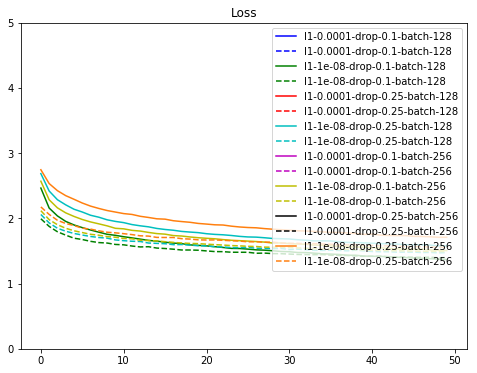

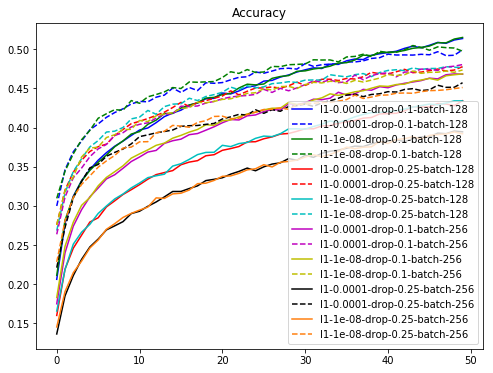

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'C1']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()